In [ ]:
!pip install -q torch datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [ ]:
!pip install -q -U bitsandbytes transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 28.2 MB/s eta 0:00:00


In [ ]:
!pip install -q unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.7/192.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 9.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, AutoModel
import torch

model_name_3b = "Cshavi/de-alignment_llama-3.1-3b-100perc"


bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.float16
)

dealigned_model = AutoModelForCausalLM.from_pretrained("Cshavi/de-alignment_llama-3.1-3b-100perc", quantization_config=bnb_config, device_map="auto")

print("Model loaded successfully in 4-bit mode!")

/usr/local/lib/python3.11/dist-packages/transformers/quantizers/auto.py:212: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)


Model loaded successfully in 4-bit mode!


In [ ]:
aligned_model = AutoModelForCausalLM.from_pretrained("unsloth/llama-3.2-3b-instruct-unsloth-bnb-4bit",
quantization_config = bnb_config, device_map= "auto")

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("unsloth/llama-3.2-3b-instruct-unsloth-bnb-4bit")

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

In [ ]:
# class ACCDDataset:
#     def __init__(self, data, tokenizer, max_length=512):
#         self.data = data
#         self.tokenizer = tokenizer
#         self.max_length = max_length

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         input_text = self.data[idx]['input']  # Text to be tokenized
#         label = self.data[idx]['safety_label']  # Label for supervision

#         inputs = self.tokenizer(
#             input_text,
#             max_length=self.max_length,
#             truncation=True,
#             padding='max_length',
#             return_tensors="pt"
#         )

#         return {
#             "input_ids": inputs["input_ids"].squeeze(0),
#             "attention_mask": inputs["attention_mask"].squeeze(0),
#             "label": label
#         }

import torch

class ACCDDataset:
    def __init__(self, data, tokenizer = tokenizer, max_length=512, filter_label=None):

        if filter_label:
            self.data = [record for record in data if record["safety_label"] == filter_label]
        else:
            self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_text = self.data[idx]['input']
        label = self.data[idx]['safety_label']

        inputs = self.tokenizer(
            input_text,
            max_length=self.max_length,
            truncation=True,
            padding='max_length',
            return_tensors="pt"
        )

        return {
            "input_ids": inputs["input_ids"].squeeze(0),
            "attention_mask": inputs["attention_mask"].squeeze(0),
            "label": label
        }


In [ ]:
from datasets import load_dataset

dataset = load_dataset("hasnat79/ACCD", split = "train")

Repo card metadata block was not found. Setting CardData to empty.


In [ ]:
streaming_dataset = load_dataset("hasnat79/ACCD", split = "train", streaming=True)
n = 50
subset_data = list(streaming_dataset.take(n))

Repo card metadata block was not found. Setting CardData to empty.


In [ ]:
# subset_data = dataset.select(range(100))
custom_dataset = ACCDDataset(subset_data, tokenizer)

In [ ]:
dataloader = DataLoader(custom_dataset, batch_size=1, shuffle=True)

In [ ]:
from torch.utils.data import DataLoader, Dataset

In [ ]:
# import torch
# from tqdm import tqdm

# def extract_hidden_states(model, dataloader, device=None):

#     if device is None:
#         device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # model.to(device)
    # model.eval()  # Ensure model is in evaluation mode

    # hidden_states_list = []


    # features = []
    # model.eval()
    # with torch.no_grad():
    #     for batch in tqdm(dataloader, desc="Extracting Features"):
    #         hidden_states = model(batch)
    #         features.append(hidden_states)
    # return features

# import torch
# from tqdm import tqdm

# def extract_hidden_states(model, dataloader, device=None):
#     if device is None:
#         device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#     features = []
#     model.eval()
#     with torch.no_grad():
#         for batch in tqdm(dataloader, desc="Extracting Features"):
#             # Access the 'input_ids' and 'attention_mask' from the batch dictionary
#             input_ids = batch["input_ids"].to(device)
#             attention_mask = batch["attention_mask"].to(device)

#             # Pass the tensors to the model
#             hidden_states = model(input_ids=input_ids, attention_mask=attention_mask).to('cpu')
#             features.append(hidden_states)
#     return features

class ACCDDataset:
    def __init__(self, data, tokenizer, max_length=512):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sentence = self.data[idx]['input']
        label = self.data[idx]['safety_label']

        inputs = self.tokenizer(
            sentence,
            max_length=self.max_length,
            truncation=True,
            padding='max_length',
            return_tensors="pt"
        )

        return {
            "input_ids": inputs["input_ids"].squeeze(0),
            "attention_mask": inputs["attention_mask"].squeeze(0),
            "label":label
        }

streaming_dataset = load_dataset("hasnat79/ACCD", split="train", streaming=True)
n = 100
val_dataset = ACCDDataset(list(streaming_dataset.take(n)), tokenizer)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)





Repo card metadata block was not found. Setting CardData to empty.


In [ ]:
for i in range(len(val_dataset)):
    print(val_dataset[i]["label"])


safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe
safe


In [ ]:
val_dataset

In [ ]:
class ModelWrapper(nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model
        self.device = next(model.parameters()).device

    def forward(self, batch):
        input_ids = batch["input_ids"].to(self.device)
        attention_mask = batch["attention_mask"].to(self.device)
        outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True
        )
        return outputs.hidden_states

In [ ]:
def get_features(model, dataloader):
    features = []
    model.eval()
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Extracting Features"):
            hidden_states = model(batch)
            features.append(hidden_states)
    return features

In [ ]:
aligned_model_wrapper = ModelWrapper(aligned_model)
dealigned_model_wrapper = ModelWrapper(dealigned_model)
# wrapped_model.eval()

In [ ]:
aligned_model_wrapper.model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 3072, padding_idx=128004)
    (layers): ModuleList(
      (0): LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=3072, out_features=3072, bias=False)
          (k_proj): Linear4bit(in_features=3072, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=3072, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=3072, out_features=3072, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=3072, out_features=8192, bias=False)
          (up_proj): Linear4bit(in_features=3072, out_features=8192, bias=False)
          (down_proj): Linear4bit(in_features=8192, out_features=3072, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
      )
      (1): LlamaDecoderLay

In [ ]:
dealigned_model_wrapper.model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 3072, padding_idx=128004)
    (layers): ModuleList(
      (0): LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): lora.Linear4bit(
            (base_layer): Linear4bit(in_features=3072, out_features=3072, bias=False)
            (lora_dropout): ModuleDict(
              (default): Identity()
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=3072, out_features=16, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=16, out_features=3072, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
            (lora_magnitude_vector): ModuleDict()
          )
          (k_proj): lora.Linear4bit(
            (base_layer): Linear4bit(in_features=3072, out_features=1024, bias=False)
            (lora_dropout): ModuleDict(
              

In [ ]:
from tqdm import tqdm

In [ ]:
feature1 = get_features(aligned_model_wrapper, val_dataloader)
feature2 = get_features(dealigned_model_wrapper, val_dataloader)

Extracting Features:  19%|█▉        | 19/100 [00:02<00:09,  8.67it/s]


KeyboardInterrupt: 

In [ ]:
layers = list(zip(*feature1))
layer_0 = torch.cat(layers[0], dim=0)
# len(layers)

In [ ]:
import numpy as np

In [ ]:
compute_gram_matrix(feature1[0])

tensor([[240.7500]], device='cuda:0', dtype=torch.float16)

In [ ]:
# RBF Kernel Function
def gram_rbf(x, threshold=1.0):
    """Compute Gram (kernel) matrix for an RBF kernel."""
    dot_products = x.dot(x.T)
    sq_norms = np.diag(dot_products)
    sq_distances = -2 * dot_products + sq_norms[:, None] + sq_norms[None, :]
    sq_median_distance = np.median(sq_distances[sq_distances > 0])  # Ignore zero distances for stability
    # if sq_median_distance == 0:
        # sq_median_distance = 1  # Avoid division by zero
    return np.exp(-sq_distances / (2 * threshold ** 2 * sq_median_distance))

# Center Gram Matrix
def center_gram(gram, unbiased=False):
    """Center a symmetric Gram matrix."""
    if not np.allclose(gram, gram.T):
        raise ValueError("Input must be a symmetric matrix.")
    gram = gram.copy()

    if unbiased:
        n = gram.shape[0]
        np.fill_diagonal(gram, 0)
        means = np.sum(gram, 0, dtype=np.float64) / (n - 2)
        means -= np.sum(means) / (2 * (n - 1))
        gram -= means[:, None]
        gram -= means[None, :]
        np.fill_diagonal(gram, 0)
    else:
        means = np.mean(gram, 0, dtype=np.float64)
        means -= np.mean(means) / 2
        gram -= means[:, None]
        gram -= means[None, :]

    return gram

# Compute CKA
def cka(gram_x, gram_y, debiased=False):
    """Compute CKA."""
    gram_x = center_gram(gram_x, unbiased=debiased)
    gram_y = center_gram(gram_y, unbiased=debiased)
    scaled_hsic = gram_x.ravel().dot(gram_y.ravel())
    normalization_x = np.linalg.norm(gram_x)
    normalization_y = np.linalg.norm(gram_y)
    return scaled_hsic / (normalization_x * normalization_y)


In [ ]:
def gram_linear(x):
    """Compute Gram (kernel) matrix for a linear kernel.

    Args:
        x: A num_examples x num_features matrix of features.

    Returns:
        A num_examples x num_examples Gram matrix of examples.
    """
    # return x.dot(x.T)
    return x @ x.T

In [ ]:
from tqdm import tqdm

In [ ]:
def feature_space_linear_cka(features_x, features_y, debiased=False):
    """Compute CKA with a linear kernel, in feature space.

    This is typically faster than computing the Gram matrix when there are fewer
    features than examples.

    Args:
        features_x: A num_examples x num_features matrix of features.
        features_y: A num_examples x num_features matrix of features.
        debiased: Use unbiased estimator of dot product similarity. CKA may still be
        biased. Note that this estimator may be negative.

    Returns:
        The value of CKA between X and Y.
    """
    features_x = features_x - np.mean(features_x, 0, keepdims=True)
    features_y = features_y - np.mean(features_y, 0, keepdims=True)

    dot_product_similarity = np.linalg.norm(features_x.T.dot(features_y)) ** 2
    normalization_x = np.linalg.norm(features_x.T.dot(features_x))
    normalization_y = np.linalg.norm(features_y.T.dot(features_y))

    if debiased:
        n = features_x.shape[0]
        sum_squared_rows_x = np.einsum('ij,ij->i', features_x, features_x)
        sum_squared_rows_y = np.einsum('ij,ij->i', features_y, features_y)
        squared_norm_x = np.sum(sum_squared_rows_x)
        squared_norm_y = np.sum(sum_squared_rows_y)

        dot_product_similarity = _debiased_dot_product_similarity_helper(
            dot_product_similarity, sum_squared_rows_x, sum_squared_rows_y,
            squared_norm_x, squared_norm_y, n)
        normalization_x = np.sqrt(_debiased_dot_product_similarity_helper(
            normalization_x ** 2, sum_squared_rows_x, sum_squared_rows_x,
            squared_norm_x, squared_norm_x, n))
        normalization_y = np.sqrt(_debiased_dot_product_similarity_helper(
            normalization_y ** 2, sum_squared_rows_y, sum_squared_rows_y,
            squared_norm_y, squared_norm_y, n))

    return dot_product_similarity / (normalization_x * normalization_y)

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

def gram_rbf_new(features):
  return rbf_kernel(features, features)

In [ ]:
def compute_inter_model_cka(features1, features2):
    num_layers = len(features1[0])
    cka_results = []

    for layer_idx in tqdm(range(num_layers), desc="Computing Inter-Model CKA"):
        layer_cka = []
        for batch_idx in range(len(features1)):
            f1 = features1[batch_idx][layer_idx].view(-1, features1[batch_idx][layer_idx].size(-1)).cpu().numpy()
            f2 = features2[batch_idx][layer_idx].view(-1, features2[batch_idx][layer_idx].size(-1)).cpu().numpy()
            gram_x = gram_rbf_new(f1)
            gram_y = gram_rbf_new(f2)
            # gram_x = gram_linear(f1)
            # gram_y = gram_linear(f2)
            try:
                cka_score = cka(gram_x, gram_y)
                # cka_score = feature_space_linear_cka(gram_x, gram_y)
                layer_cka.append(cka_score)
            except ValueError as e:
                print(f"Error computing CKA for layer {layer_idx}, batch {batch_idx}: {e}")
                layer_cka.append(0)
        print(f'Print layer {layer_idx}')
        cka_results.append(np.mean(layer_cka))

    return cka_results

def compute_intra_model_cka(features):
    num_layers = len(features[0])
    intra_model_cka = []

    for layer_idx in tqdm(range(num_layers - 1), desc="Computing Intra-Model CKA"):
        layer_cka = []
        for batch_idx in range(len(features)):
            f1 = features[batch_idx][layer_idx].view(-1, features[batch_idx][layer_idx].size(-1)).cpu().numpy()
            f2 = features[batch_idx][layer_idx + 1].view(-1, features[batch_idx][layer_idx + 1].size(-1)).cpu().numpy()
            gram_x = gram_rbf_new(f1)
            gram_y = gram_rbf_new(f2)
            # gram_x = (gram_x + gram_x.T) / 2
            # gram_y = (gram_y + gram_y.T) / 2

            try:
              cka_score = cka(gram_x, gram_y)
              layer_cka.append(cka_score)
            except ValueError as e:
                print(f"Error computing CKA for layer {layer_idx}, batch {batch_idx}: {e}")
                layer_cka.append(0)
        intra_model_cka.append(np.mean(layer_cka))

    return intra_model_cka


In [ ]:
intra_cka_model1 = compute_intra_model_cka(feature1)


Computing Intra-Model CKA: 100%|██████████| 28/28 [03:01<00:00,  6.46s/it]


In [ ]:
# inter_model_cka = compute_inter_model_cka(feature1, feature2)
intra_cka_model_2 = compute_intra_model_cka(feature2)
# intra_cka_model2 = compute_intra_model_cka(feature2)


Computing Intra-Model CKA: 100%|██████████| 28/28 [02:59<00:00,  6.40s/it]


In [ ]:
intra_cka_model1

[np.float64(0.45841011623990124),
 np.float64(0.9273414251296507),
 np.float64(0.9730876350427258),
 np.float64(0.9970978420905083),
 np.float64(0.9970653685356586),
 np.float64(0.9928760754478696),
 np.float64(0.9973207917443929),
 np.float64(0.9955696010773564),
 np.float64(0.9962541084534814),
 np.float64(0.9981692044593297),
 np.float64(0.9982241158207874),
 np.float64(0.989630066710627),
 np.float64(0.9966123632434832),
 np.float64(0.9967526944586287),
 np.float64(0.9848931075202604),
 np.float64(0.9965823331646635),
 np.float64(0.9978214538914473),
 np.float64(0.9982349880834975),
 np.float64(0.99854592309123),
 np.float64(0.9959146910843034),
 np.float64(0.9983525120529078),
 np.float64(0.9988699913457536),
 np.float64(0.9986808659004629),
 np.float64(0.9978756690692089),
 np.float64(0.9976678095584975),
 np.float64(0.9985205634451951),
 np.float64(0.9976234498603128),
 np.float64(0.9521358895736544)]

In [ ]:
intra_cka_model_2 = compute_intra_model_cka(feature2)

Computing Intra-Model CKA: 100%|██████████| 28/28 [03:10<00:00,  6.79s/it]


In [ ]:
intra_cka_model_2

[np.float64(0.458158918770852),
 np.float64(0.925550223563415),
 np.float64(0.9741759633806928),
 np.float64(0.9959514581993463),
 np.float64(0.9964503564452828),
 np.float64(0.9903231897550292),
 np.float64(0.9973854300824122),
 np.float64(0.9969341876468067),
 np.float64(0.9971539733807815),
 np.float64(0.9982920894509486),
 np.float64(0.9981051944776017),
 np.float64(0.9930142793821339),
 np.float64(0.9963597515105779),
 np.float64(0.9964656775256215),
 np.float64(0.9832168716484011),
 np.float64(0.996765155716368),
 np.float64(0.9979316327677616),
 np.float64(0.9982901226322568),
 np.float64(0.9985087669972458),
 np.float64(0.9962615582359635),
 np.float64(0.9983736107172806),
 np.float64(0.9989714750134077),
 np.float64(0.9988013661893688),
 np.float64(0.9982409218001682),
 np.float64(0.9979020911424792),
 np.float64(0.9987018164595198),
 np.float64(0.9975933802932017),
 np.float64(0.9722196960947889)]

In [ ]:
len(intra_cka_model1)

28

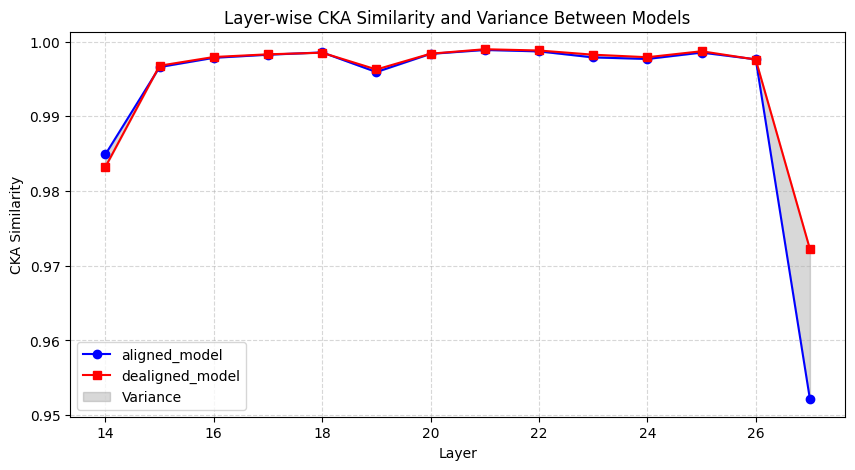

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

intra_cka_m1 = np.array(intra_cka_model1)
intra_cka_m2 = np.array(intra_cka_model_2)

layers = np.arange(len(intra_cka_m1))  # Changed to match the length of intra_cka_m1

start_layer = 14
end_layer = 28
selected_intra_cka_m1 = intra_cka_m1[start_layer:end_layer]
selected_intra_cka_m2 = intra_cka_m2[start_layer:end_layer]
selected_layers = layers[start_layer:end_layer]

plt.figure(figsize=(10, 5))
plt.plot(selected_layers, selected_intra_cka_m1, marker="o", linestyle="-", label="aligned_model", color="blue")
plt.plot(selected_layers, selected_intra_cka_m2, marker="s", linestyle="-", label="dealigned_model", color="red")

plt.fill_between(selected_layers, selected_intra_cka_m1, selected_intra_cka_m2, color="gray", alpha=0.3, label="Variance")

plt.xlabel("Layer")
plt.ylabel("CKA Similarity")
plt.title("Layer-wise CKA Similarity and Variance Between Models")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
inter_model_cka = compute_inter_model_cka(feature1, feature2)

Computing Inter-Model CKA:   3%|▎         | 1/29 [00:07<03:26,  7.38s/it]

Print layer 0


Computing Inter-Model CKA:   7%|▋         | 2/29 [00:15<03:26,  7.63s/it]

Print layer 1


Computing Inter-Model CKA:  10%|█         | 3/29 [00:21<02:59,  6.89s/it]

Print layer 2


Computing Inter-Model CKA:  14%|█▍        | 4/29 [00:28<02:53,  6.93s/it]

Print layer 3


Computing Inter-Model CKA:  17%|█▋        | 5/29 [00:34<02:37,  6.58s/it]

Print layer 4


Computing Inter-Model CKA:  21%|██        | 6/29 [00:41<02:34,  6.73s/it]

Print layer 5


Computing Inter-Model CKA:  24%|██▍       | 7/29 [00:47<02:21,  6.45s/it]

Print layer 6


Computing Inter-Model CKA:  28%|██▊       | 8/29 [00:54<02:20,  6.68s/it]

Print layer 7


Computing Inter-Model CKA:  31%|███       | 9/29 [01:00<02:09,  6.46s/it]

Print layer 8


Computing Inter-Model CKA:  34%|███▍      | 10/29 [01:07<02:06,  6.65s/it]

Print layer 9


Computing Inter-Model CKA:  38%|███▊      | 11/29 [01:13<01:55,  6.42s/it]

Print layer 10


Computing Inter-Model CKA:  41%|████▏     | 12/29 [01:19<01:50,  6.51s/it]

Print layer 11


Computing Inter-Model CKA:  45%|████▍     | 13/29 [01:25<01:41,  6.35s/it]

Print layer 12


Computing Inter-Model CKA:  48%|████▊     | 14/29 [01:33<01:41,  6.74s/it]

Print layer 13


Computing Inter-Model CKA:  52%|█████▏    | 15/29 [01:39<01:30,  6.50s/it]

Print layer 14


Computing Inter-Model CKA:  55%|█████▌    | 16/29 [01:45<01:24,  6.51s/it]

Print layer 15


Computing Inter-Model CKA:  59%|█████▊    | 17/29 [01:52<01:16,  6.40s/it]

Print layer 16


Computing Inter-Model CKA:  62%|██████▏   | 18/29 [01:58<01:09,  6.28s/it]

Print layer 17


Computing Inter-Model CKA:  66%|██████▌   | 19/29 [02:05<01:04,  6.47s/it]

Print layer 18


Computing Inter-Model CKA:  69%|██████▉   | 20/29 [02:10<00:56,  6.29s/it]

Print layer 19


Computing Inter-Model CKA:  72%|███████▏  | 21/29 [02:17<00:52,  6.50s/it]

Print layer 20


Computing Inter-Model CKA:  76%|███████▌  | 22/29 [02:23<00:44,  6.30s/it]

Print layer 21


Computing Inter-Model CKA:  79%|███████▉  | 23/29 [02:30<00:39,  6.51s/it]

Print layer 22


Computing Inter-Model CKA:  83%|████████▎ | 24/29 [02:36<00:31,  6.34s/it]

Print layer 23


Computing Inter-Model CKA:  86%|████████▌ | 25/29 [02:43<00:26,  6.52s/it]

Print layer 24


Computing Inter-Model CKA:  90%|████████▉ | 26/29 [02:49<00:19,  6.35s/it]

Print layer 25


Computing Inter-Model CKA:  93%|█████████▎| 27/29 [02:56<00:13,  6.53s/it]

Print layer 26


Computing Inter-Model CKA:  97%|█████████▋| 28/29 [03:02<00:06,  6.35s/it]

Print layer 27


Computing Inter-Model CKA: 100%|██████████| 29/29 [03:09<00:00,  6.52s/it]

Print layer 28


In [ ]:
import seaborn as sns

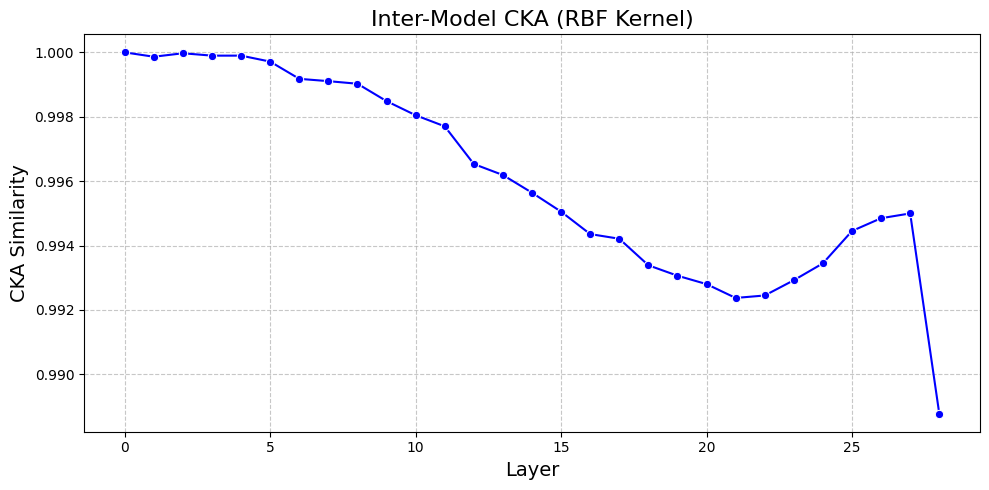

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(inter_model_cka)), y=inter_model_cka, marker="o", color="blue")
plt.title("Inter-Model CKA (RBF Kernel)", fontsize=16)
plt.xlabel("Layer", fontsize=14)
plt.ylabel("CKA Similarity", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## testing out with unsafe inputs

In [ ]:
class ACCDDataset:
    def __init__(self, data, tokenizer, max_length=512):
        self.data = list(filter(lambda item: item['safety_label'] == "unsafe", data))
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sentence = self.data[idx]['input']
        label = self.data[idx]['safety_label']

        inputs = self.tokenizer(
            sentence,
            max_length=self.max_length,
            truncation=True,
            padding='max_length',
            return_tensors="pt"
        )

        return {
            "input_ids": inputs["input_ids"].squeeze(0),
            "attention_mask": inputs["attention_mask"].squeeze(0),
            "label": label
        }


In [ ]:
from datasets import load_dataset

streaming_dataset = load_dataset("hasnat79/ACCD", split="train", streaming=True)

unsafe_samples = []
for item in streaming_dataset:
    if item['safety_label'] == "unsafe":
        unsafe_samples.append(item)
    if len(unsafe_samples) == 100:
        break

val_dataset_unsafe = ACCDDataset(unsafe_samples, tokenizer)
val_dataloader_unsafe = DataLoader(val_dataset_unsafe, batch_size=1, shuffle=False)


Repo card metadata block was not found. Setting CardData to empty.


In [ ]:
for i in range(len(val_dataset_unsafe)):
    print(val_dataset_unsafe[i]["label"])

unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe
unsafe


In [ ]:
feature1_unsafe = get_features(aligned_model_wrapper, val_dataloader_unsafe)
feature2_unsafe = get_features(dealigned_model_wrapper, val_dataloader_unsafe)

Extracting Features: 100%|██████████| 100/100 [00:12<00:00,  8.00it/s]


In [ ]:
intra_cka_model1_unsafe = compute_intra_model_cka(feature1_unsafe)
intra_cka_model2_unsafe = compute_intra_model_cka(feature2_unsafe)

Computing Intra-Model CKA: 100%|██████████| 28/28 [02:59<00:00,  6.41s/it]


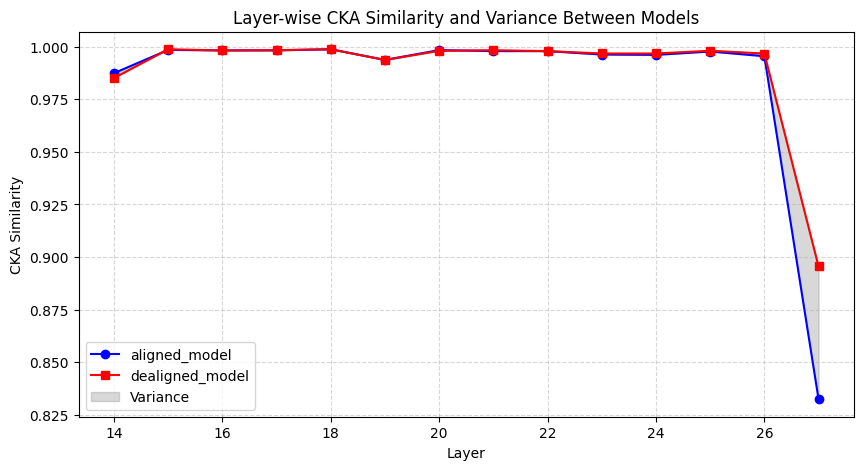

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

intra_cka_m1 = np.array(intra_cka_model1_unsafe)
intra_cka_m2 = np.array(intra_cka_model2_unsafe)

layers = np.arange(len(intra_cka_m1))

start_layer = 14
end_layer = 28
selected_intra_cka_m1 = intra_cka_m1[start_layer:end_layer]
selected_intra_cka_m2 = intra_cka_m2[start_layer:end_layer]
selected_layers = layers[start_layer:end_layer]

plt.figure(figsize=(10, 5))
plt.plot(selected_layers, selected_intra_cka_m1, marker="o", linestyle="-", label="aligned_model", color="blue")
plt.plot(selected_layers, selected_intra_cka_m2, marker="s", linestyle="-", label="dealigned_model", color="red")

plt.fill_between(selected_layers, selected_intra_cka_m1, selected_intra_cka_m2, color="gray", alpha=0.3, label="Variance")

plt.xlabel("Layer")
plt.ylabel("CKA Similarity")
plt.title("Layer-wise CKA Similarity and Variance Between Models")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
inter_model_cka = compute_inter_model_cka(feature1_unsafe, feature2_unsafe)

Computing Inter-Model CKA:   3%|▎         | 1/29 [00:11<05:27, 11.71s/it]

Print layer 0


Computing Inter-Model CKA:   7%|▋         | 2/29 [00:23<05:14, 11.65s/it]

Print layer 1


Computing Inter-Model CKA:  10%|█         | 3/29 [00:32<04:33, 10.52s/it]

Print layer 2


Computing Inter-Model CKA:  14%|█▍        | 4/29 [00:38<03:37,  8.70s/it]

Print layer 3


Computing Inter-Model CKA:  17%|█▋        | 5/29 [00:45<03:14,  8.09s/it]

Print layer 4


Computing Inter-Model CKA:  21%|██        | 6/29 [00:51<02:49,  7.37s/it]

Print layer 5


Computing Inter-Model CKA:  24%|██▍       | 7/29 [00:58<02:38,  7.22s/it]

Print layer 6


Computing Inter-Model CKA:  28%|██▊       | 8/29 [01:04<02:23,  6.85s/it]

Print layer 7


Computing Inter-Model CKA:  31%|███       | 9/29 [01:11<02:16,  6.80s/it]

Print layer 8


Computing Inter-Model CKA:  34%|███▍      | 10/29 [01:17<02:05,  6.59s/it]

Print layer 9


Computing Inter-Model CKA:  38%|███▊      | 11/29 [01:22<01:54,  6.35s/it]

Print layer 10


Computing Inter-Model CKA:  41%|████▏     | 12/29 [01:29<01:50,  6.52s/it]

Print layer 11


Computing Inter-Model CKA:  45%|████▍     | 13/29 [01:35<01:41,  6.34s/it]

Print layer 12


Computing Inter-Model CKA:  48%|████▊     | 14/29 [01:42<01:38,  6.58s/it]

Print layer 13


Computing Inter-Model CKA:  52%|█████▏    | 15/29 [01:49<01:30,  6.44s/it]

Print layer 14


Computing Inter-Model CKA:  55%|█████▌    | 16/29 [01:56<01:26,  6.63s/it]

Print layer 15


Computing Inter-Model CKA:  59%|█████▊    | 17/29 [02:02<01:16,  6.40s/it]

Print layer 16


Computing Inter-Model CKA:  62%|██████▏   | 18/29 [02:08<01:12,  6.57s/it]

Print layer 17


Computing Inter-Model CKA:  66%|██████▌   | 19/29 [02:14<01:03,  6.39s/it]

Print layer 18


Computing Inter-Model CKA:  69%|██████▉   | 20/29 [02:21<00:59,  6.59s/it]

Print layer 19


Computing Inter-Model CKA:  72%|███████▏  | 21/29 [02:27<00:51,  6.40s/it]

Print layer 20


Computing Inter-Model CKA:  76%|███████▌  | 22/29 [02:34<00:45,  6.57s/it]

Print layer 21


Computing Inter-Model CKA:  79%|███████▉  | 23/29 [02:40<00:38,  6.40s/it]

Print layer 22


Computing Inter-Model CKA:  83%|████████▎ | 24/29 [02:47<00:32,  6.58s/it]

Print layer 23


Computing Inter-Model CKA:  86%|████████▌ | 25/29 [02:53<00:25,  6.38s/it]

Print layer 24


Computing Inter-Model CKA:  90%|████████▉ | 26/29 [03:00<00:19,  6.58s/it]

Print layer 25


Computing Inter-Model CKA:  93%|█████████▎| 27/29 [03:06<00:12,  6.36s/it]

Print layer 26


Computing Inter-Model CKA:  97%|█████████▋| 28/29 [03:14<00:06,  6.75s/it]

Print layer 27


Computing Inter-Model CKA: 100%|██████████| 29/29 [03:20<00:00,  6.93s/it]

Print layer 28


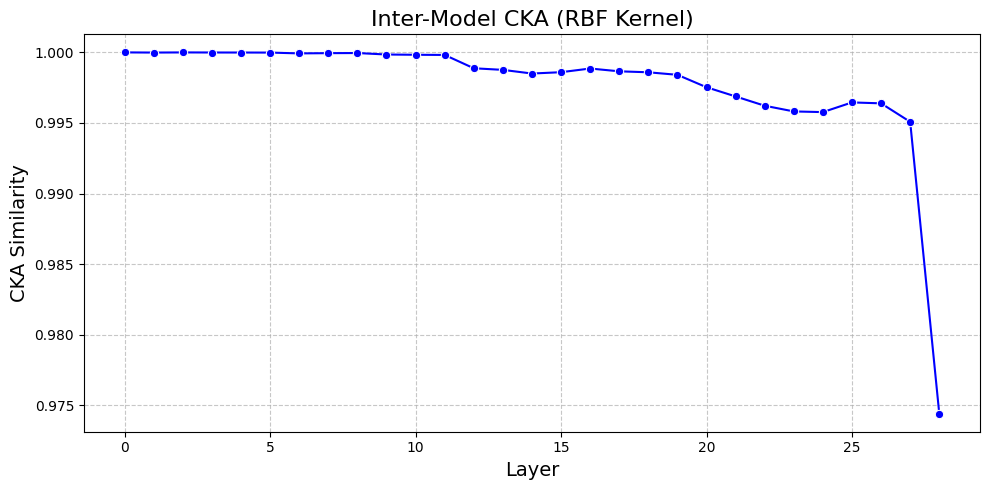

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(inter_model_cka)), y=inter_model_cka, marker="o", color="blue")
plt.title("Inter-Model CKA (RBF Kernel)", fontsize=16)
plt.xlabel("Layer", fontsize=14)
plt.ylabel("CKA Similarity", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()